<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin/Bitcoin_Identification_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

# Téléchargement des données

In [1]:
!wget --no-check-certificate --content-disposition "https://github.com/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin/Bitcoin_complet.zip?raw=true"
!unzip Bitcoin_complet.zip

--2021-04-30 18:03:23--  https://github.com/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin/Bitcoin_complet.zip?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AlexandreBourrieau/ML/raw/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin/Bitcoin_complet.zip [following]
--2021-04-30 18:03:24--  https://github.com/AlexandreBourrieau/ML/raw/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin/Bitcoin_complet.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/Bitcoin/Bitcoin_complet.zip [following]
--2021-04-30 18:03:24--  https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporel

In [6]:
df_data=pd.read_csv('Bitcoin_complet.csv')
df_data.shape

(2309, 780)

In [7]:
df_data.head()

,Dates,#Active_Adresses,Block Size,Block Time,FeeInReward,Price,Transaction Fee,Transaction Value,#From_Adresses,Google GTrends,Hashrate,Capitalization,Median Transaction Fee,Median Transaction Value,Difficulty,#Transactions,Profiltability,Sent,Top100,Tweets,#Active_Adresses_sma3,Block Size_sma3,Block Time_sma3,FeeInReward_sma3,Price_sma3,Transaction Fee_sma3,Transaction Value_sma3,#From_Adresses_sma3,Google GTrends_sma3,Hashrate_sma3,Capitalization_sma3,Median Transaction Fee_sma3,Median Transaction Value_sma3,Difficulty_sma3,#Transactions_sma3,Profiltability_sma3,Sent_sma3,Top100_sma3,Tweets_sma3,#Active_Adresses_sma7,...,Top100_roc14,Tweets_roc14,#Active_Adresses_roc30,Block Size_roc30,Block Time_roc30,FeeInReward_roc30,Price_roc30,Transaction Fee_roc30,Transaction Value_roc30,#From_Adresses_roc30,Google GTrends_roc30,Hashrate_roc30,Capitalization_roc30,Median Transaction Fee_roc30,Median Transaction Value_roc30,Difficulty_roc30,#Transactions_roc30,Profiltability_roc30,Sent_roc30,Top100_roc30,Tweets_roc30,#Active_Adresses_roc90,Block Size_roc90,Block Time_roc90,FeeInReward_roc90,Price_roc90,Transaction Fee_roc90,Transaction Value_roc90,#From_Adresses_roc90,Google GTrends_roc90,Hashrate_roc90,Capitalization_roc90,Median Transaction Fee_roc90,Median Transaction Value_roc90,Difficulty_roc90,#Transactions_roc90,Profiltability_roc90,Sent_roc90,Top100_roc90,Tweets_roc90
0,2015-01-01,114998.0,187402.0,8.727,0.195,315.626,0.0430,2500.0,93422.0,6.703,3.221646e+17,4.287908e+09,0.0316,78.474,4.064096e+10,59179.0,4.049,129854868.0,21.241,18681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,184462.0,265055.0,8.727,0.286,314.346,0.0470,2878.0,135337.0,7.625,3.302051e+17,4.272409e+09,0.0314,124.895,4.064096e+10,79122.0,3.938,212156964.0,21.197,9385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,216194.0,295066.0,8.889,0.291,303.591,0.0436,3052.0,143066.0,7.736,3.337177e+17,4.078336e+09,0.0304,97.849,4.064096e+10,82065.0,3.695,235281521.0,21.127,8342.5,171884.666667,249174.333333,8.781000,0.257333,311.187667,0.044533,2810.000000,123941.666667,7.354667,3.286958e+17,4.212884e+09,0.031133,100.406000,4.064096e+10,73455.333333,3.894000,1.924311e+08,21.188333,12136.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,209509.0,282161.0,8.372,0.504,274.820,0.0699,3646.0,142557.0,9.266,3.311977e+17,3.762088e+09,0.0275,103.775,4.064096e+10,85522.0,3.586,271649082.0,21.157,7300.0,203388.333333,280760.666667,8.662667,0.360333,297.585667,0.053500,3192.000000,140320.000000,8.209000,3.317068e+17,4.037611e+09,0.029767,108.839667,4.064096e+10,82236.333333,3.739667,2.396959e+08,21.160333,8342.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,208147.0,360878.0,9.231,0.412,272.076,0.0459,3222.0,161359.0,9.439,3.350929e+17,3.705753e+09,0.0272,90.598,4.064096e+10,95429.0,3.180,283038295.0,21.155,23092.0,211283.333333,312701.666667,8.830667,0.402333,283.495667,0.053133,3306.666667,148994.000000,8.813667,3.333361e+17,3.848725e+09,0.028367,97.407333,4.064096e+10,87672.000000,3.487000,2.633230e+08,21.146333,12911.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Préparation des jeux de données

In [8]:
# Déplace la colonne Prix au début
col_prix = df_data.pop('Price')
df_data.insert(1,'Price',col_prix)
df_data.head()

,Dates,Price,#Active_Adresses,Block Size,Block Time,FeeInReward,Transaction Fee,Transaction Value,#From_Adresses,Google GTrends,Hashrate,Capitalization,Median Transaction Fee,Median Transaction Value,Difficulty,#Transactions,Profiltability,Sent,Top100,Tweets,#Active_Adresses_sma3,Block Size_sma3,Block Time_sma3,FeeInReward_sma3,Price_sma3,Transaction Fee_sma3,Transaction Value_sma3,#From_Adresses_sma3,Google GTrends_sma3,Hashrate_sma3,Capitalization_sma3,Median Transaction Fee_sma3,Median Transaction Value_sma3,Difficulty_sma3,#Transactions_sma3,Profiltability_sma3,Sent_sma3,Top100_sma3,Tweets_sma3,#Active_Adresses_sma7,...,Top100_roc14,Tweets_roc14,#Active_Adresses_roc30,Block Size_roc30,Block Time_roc30,FeeInReward_roc30,Price_roc30,Transaction Fee_roc30,Transaction Value_roc30,#From_Adresses_roc30,Google GTrends_roc30,Hashrate_roc30,Capitalization_roc30,Median Transaction Fee_roc30,Median Transaction Value_roc30,Difficulty_roc30,#Transactions_roc30,Profiltability_roc30,Sent_roc30,Top100_roc30,Tweets_roc30,#Active_Adresses_roc90,Block Size_roc90,Block Time_roc90,FeeInReward_roc90,Price_roc90,Transaction Fee_roc90,Transaction Value_roc90,#From_Adresses_roc90,Google GTrends_roc90,Hashrate_roc90,Capitalization_roc90,Median Transaction Fee_roc90,Median Transaction Value_roc90,Difficulty_roc90,#Transactions_roc90,Profiltability_roc90,Sent_roc90,Top100_roc90,Tweets_roc90
0,2015-01-01,315.626,114998.0,187402.0,8.727,0.195,0.0430,2500.0,93422.0,6.703,3.221646e+17,4.287908e+09,0.0316,78.474,4.064096e+10,59179.0,4.049,129854868.0,21.241,18681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,314.346,184462.0,265055.0,8.727,0.286,0.0470,2878.0,135337.0,7.625,3.302051e+17,4.272409e+09,0.0314,124.895,4.064096e+10,79122.0,3.938,212156964.0,21.197,9385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,303.591,216194.0,295066.0,8.889,0.291,0.0436,3052.0,143066.0,7.736,3.337177e+17,4.078336e+09,0.0304,97.849,4.064096e+10,82065.0,3.695,235281521.0,21.127,8342.5,171884.666667,249174.333333,8.781000,0.257333,311.187667,0.044533,2810.000000,123941.666667,7.354667,3.286958e+17,4.212884e+09,0.031133,100.406000,4.064096e+10,73455.333333,3.894000,1.924311e+08,21.188333,12136.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,274.820,209509.0,282161.0,8.372,0.504,0.0699,3646.0,142557.0,9.266,3.311977e+17,3.762088e+09,0.0275,103.775,4.064096e+10,85522.0,3.586,271649082.0,21.157,7300.0,203388.333333,280760.666667,8.662667,0.360333,297.585667,0.053500,3192.000000,140320.000000,8.209000,3.317068e+17,4.037611e+09,0.029767,108.839667,4.064096e+10,82236.333333,3.739667,2.396959e+08,21.160333,8342.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,272.076,208147.0,360878.0,9.231,0.412,0.0459,3222.0,161359.0,9.439,3.350929e+17,3.705753e+09,0.0272,90.598,4.064096e+10,95429.0,3.180,283038295.0,21.155,23092.0,211283.333333,312701.666667,8.830667,0.402333,283.495667,0.053133,3306.666667,148994.000000,8.813667,3.333361e+17,3.848725e+09,0.028367,97.407333,4.064096e+10,87672.000000,3.487000,2.633230e+08,21.146333,12911.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
X_raw = df_data.iloc[:,2:20]
X_raw.head()

,#Active_Adresses,Block Size,Block Time,FeeInReward,Transaction Fee,Transaction Value,#From_Adresses,Google GTrends,Hashrate,Capitalization,Median Transaction Fee,Median Transaction Value,Difficulty,#Transactions,Profiltability,Sent,Top100,Tweets
0,114998.0,187402.0,8.727,0.195,0.0430,2500.0,93422.0,6.703,3.221646e+17,4.287908e+09,0.0316,78.474,4.064096e+10,59179.0,4.049,129854868.0,21.241,18681.0
1,184462.0,265055.0,8.727,0.286,0.0470,2878.0,135337.0,7.625,3.302051e+17,4.272409e+09,0.0314,124.895,4.064096e+10,79122.0,3.938,212156964.0,21.197,9385.0
2,216194.0,295066.0,8.889,0.291,0.0436,3052.0,143066.0,7.736,3.337177e+17,4.078336e+09,0.0304,97.849,4.064096e+10,82065.0,3.695,235281521.0,21.127,8342.5
3,209509.0,282161.0,8.372,0.504,0.0699,3646.0,142557.0,9.266,3.311977e+17,3.762088e+09,0.0275,103.775,4.064096e+10,85522.0,3.586,271649082.0,21.157,7300.0
4,208147.0,360878.0,9.231,0.412,0.0459,3222.0,161359.0,9.439,3.350929e+17,3.705753e+09,0.0272,90.598,4.064096e+10,95429.0,3.180,283038295.0,21.155,23092.0


In [10]:
y = df_data.iloc[:,1:2]
y.head()

,Price
0,315.626
1,314.346
2,303.591
3,274.820
4,272.076


# Identification des variables par Random Forest : Choix des paramètres

**1. Construction du dataframe sur 1 jour**

In [11]:
X = df_data
X = X.drop(columns=['Price','Dates'])
Xdrop = SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(X)
Xdrop = pd.DataFrame(Xdrop)
Xdrop.columns =X.columns
X = Xdrop
X

,#Active_Adresses,Block Size,Block Time,FeeInReward,Transaction Fee,Transaction Value,#From_Adresses,Google GTrends,Hashrate,Capitalization,Median Transaction Fee,Median Transaction Value,Difficulty,#Transactions,Profiltability,Sent,Top100,Tweets,#Active_Adresses_sma3,Block Size_sma3,Block Time_sma3,FeeInReward_sma3,Price_sma3,Transaction Fee_sma3,Transaction Value_sma3,#From_Adresses_sma3,Google GTrends_sma3,Hashrate_sma3,Capitalization_sma3,Median Transaction Fee_sma3,Median Transaction Value_sma3,Difficulty_sma3,#Transactions_sma3,Profiltability_sma3,Sent_sma3,Top100_sma3,Tweets_sma3,#Active_Adresses_sma7,Block Size_sma7,Block Time_sma7,...,Top100_roc14,Tweets_roc14,#Active_Adresses_roc30,Block Size_roc30,Block Time_roc30,FeeInReward_roc30,Price_roc30,Transaction Fee_roc30,Transaction Value_roc30,#From_Adresses_roc30,Google GTrends_roc30,Hashrate_roc30,Capitalization_roc30,Median Transaction Fee_roc30,Median Transaction Value_roc30,Difficulty_roc30,#Transactions_roc30,Profiltability_roc30,Sent_roc30,Top100_roc30,Tweets_roc30,#Active_Adresses_roc90,Block Size_roc90,Block Time_roc90,FeeInReward_roc90,Price_roc90,Transaction Fee_roc90,Transaction Value_roc90,#From_Adresses_roc90,Google GTrends_roc90,Hashrate_roc90,Capitalization_roc90,Median Transaction Fee_roc90,Median Transaction Value_roc90,Difficulty_roc90,#Transactions_roc90,Profiltability_roc90,Sent_roc90,Top100_roc90,Tweets_roc90
0,114998.0,187402.0,8.727,0.195,0.0430,2500.0,93422.0,6.703,3.221646e+17,4.287908e+09,0.0316,78.474,4.064096e+10,59179.0,4.049,1.298549e+08,21.241,18681.0,568638.333333,718313.666667,8.996667,0.399333,999.189333,0.069233,1989.666667,320173.000000,6.595667,2.738239e+17,2.759515e+09,0.023700,21.981233,6.653303e+12,314527.000000,0.134333,1.233088e+08,15.635000,23921.333333,184621.857143,971614.285714,9.064429,...,0.000000,-71.291596,-72.362626,-59.963023,0.000000,6.224490,-59.050977,0.000000,-96.787660,-57.313957,0.000000,-38.979472,-58.897265,0.000000,-99.917607,-7.372408,-54.163214,0.000000,-94.052223,0.000000,-73.196680,-70.386909,-62.128476,0.000000,-96.513536,100.000000,0.000000,-97.053662,-65.233857,-20.671771,-38.509627,-59.822936,0.000000,-99.889587,84.855708,-61.829769,0.000000,-96.781896,0.000000,-80.675444
1,184462.0,265055.0,8.727,0.286,0.0470,2878.0,135337.0,7.625,3.302051e+17,4.272409e+09,0.0314,124.895,4.064096e+10,79122.0,3.938,2.121570e+08,21.197,9385.0,568638.333333,718313.666667,8.996667,0.399333,999.189333,0.069233,1989.666667,320173.000000,6.595667,2.738239e+17,2.759515e+09,0.023700,21.981233,6.653303e+12,314527.000000,0.134333,1.233088e+08,15.635000,23921.333333,184621.857143,971614.285714,9.064429,...,0.000000,-71.291596,-72.362626,-59.963023,0.000000,6.224490,-59.050977,0.000000,-96.787660,-57.313957,0.000000,-38.979472,-58.897265,0.000000,-99.917607,-7.372408,-54.163214,0.000000,-94.052223,0.000000,-73.196680,-70.386909,-62.128476,0.000000,-96.513536,100.000000,0.000000,-97.053662,-65.233857,-20.671771,-38.509627,-59.822936,0.000000,-99.889587,84.855708,-61.829769,0.000000,-96.781896,0.000000,-80.675444
2,216194.0,295066.0,8.889,0.291,0.0436,3052.0,143066.0,7.736,3.337177e+17,4.078336e+09,0.0304,97.849,4.064096e+10,82065.0,3.695,2.352815e+08,21.127,8342.5,171884.666667,249174.333333,8.781000,0.257333,311.187667,0.044533,2810.000000,123941.666667,7.354667,3.286958e+17,4.212884e+09,0.031133,100.406000,4.064096e+10,73455.333333,3.894000,1.924311e+08,21.188333,12136.166667,184621.857143,971614.285714,9.064429,...,0.000000,-71.291596,-72.362626,-59.963023,0.000000,6.224490,-59.050977,0.000000,-96.787660,-57.313957,0.000000,-38.979472,-58.897265,0.000000,-99.917607,-7.372408,-54.163214,0.000000,-94.052223,0.000000,-73.196680,-70.386909,-62.128476,0.000000,-96.513536,100.000000,0.000000,-97.053662,-65.233857,-20.671771,-38.509627,-59.822936,0.000000,-99.889587,84.855708,-61.829769,0.000000,-96.781896,0.000000,-80.675444
3,209509.0,282161.0,8.372,0.504,0.0699,3646.0,142557.0,9.266,3.311977e+17,3.762088e+09,0.0275,103.775,4.064096e

**2. Choix du nombre d'arbres :**

In [ ]:
# Informations sur les données
n = 2309              # Nombre d'observations
p = 778               # Nombre de variables

n_arbres_max = 25

n_arbres = np.linspace(1,n_arbres_max,10).astype(np.int32)
mtry = np.sqrt(p).astype(np.int32)
OOB_err = []

for i in n_arbres:
  print("#Arbres : %d" %i)
  clf = RandomForestRegressor(n_estimators=i, bootstrap=True, oob_score=True, max_samples = n, max_features = mtry, n_jobs=-1)
  clf.fit(X,tf.squeeze(np.asarray(y),1))
  OOB_err.append(1 - clf.oob_score_)

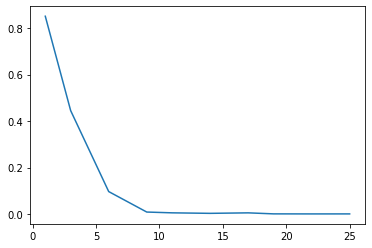

In [ ]:
plt.plot(n_arbres,OOB_err)

On choisit n_arbres = 25

**3. Choix de la valeur de mtry (nombre de variables testées à chaque division)**

In [ ]:
(np.sqrt(p)/2).astype(np.int32)

In [ ]:
# Informations sur les données
n = 2309              # Nombre d'observations
p = 778               # Nombre de variables

n_arbres = 25
mtry_0 = (np.sqrt(p)/2).astype(np.int32)

m_try = np.linspace(mtry_0,778,10).astype(np.int32)

OOB_err = []

for i in m_try:
   print("mtry = %s" %i)
   clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features=i, n_jobs=-1)
   clf.fit(X,tf.squeeze(np.asarray(y),1))
   OOB_err.append(1 - clf.oob_score_)

In [ ]:
plt.plot(m_try,OOB_err)

On choisit mtry = 768

# Importance des variables - Pemière approche : Importance sans permutations

**1. Entrainement de la forêt**

In [12]:
from sklearn.inspection import permutation_importance

# Informations sur les données
n = 102               # Nombre d'observations
p = 6033              # Nombre de variables
n_arbres = 25
m_try = 768

clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features=m_try, n_jobs=-1)
clf.fit(X,tf.squeeze(np.asarray(y),1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=768, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

**2. Affichage de l'importance des variables**

In [14]:
col_sorted_by_importance=clf.feature_importances_.argsort()
feat_imp = pd.DataFrame({'cols':X.columns[col_sorted_by_importance],'imps':clf.feature_importances_[col_sorted_by_importance]})
feat_imp

,cols,imps
0,Transaction Fee_ema14,1.404992e-09
1,Google GTrends_std7,1.492053e-09
2,Median Transaction Fee_rsi30,2.098981e-09
3,Difficulty_roc7,2.128329e-09
4,FeeInReward_trix14,2.489184e-09
...,...,...
773,Capitalization_trix3,3.912887e-02
774,Transaction Value_sma90,6.169634e-02
775,Price_wma30,9.098488e-02
776,Capitalization_ema14,9.180305e-02


In [15]:
!pip install plotly_express --upgrade -q

In [16]:
import plotly_express as px
import plotly.offline as po

px.bar(feat_imp.sort_values(['imps'], ascending=False)[:30], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

# Importance des variables - Deuxième approche : Méthode par permutations des importances

Permutation importance is a technique where we shuffle the values of a single column and run the model to see how the scores get affected. If the scores are affected greatly, then the feature is highly important to the model and if not, it does not add significant value to the model.

Let us see the feature importances for recall score on the test dataset.

In [17]:
import random

def PermImportance(X, y, clf, metric, num_iterations=100):
    '''
    Calculates the permutation importance of features in a dataset.
    Inputs:
    X: dataframe with all the features
    y: array-like sequence of labels
    clf: sklearn classifier, already trained on training data
    num_iterations: no. of repetitive runs of the permutation
    Outputs:
    baseline: the baseline metric without any of the columns permutated
    scores: differences in baseline metric caused by permutation of each feature, dict in the format {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(max_value=len(X.columns))
#    baseline_metric=metric(y, clf.predict(X))
    baseline_metric=clf.score(X,y)
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
#            score=metric(y, clf.predict(X1))
            score = clf.score(X1,y)
            scores[c].append(baseline_metric-score)
        bar.update(X.columns.tolist().index(c))
    return baseline_metric, scores

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import progressbar

baseline, scores = PermImportance(X, tf.squeeze(np.asarray(y),1), clf, recall_score, num_iterations=10)

 99% (777 of 778) |##################### | Elapsed Time: 0:14:03 ETA:   0:00:01

In [19]:
percent_changes={c:[] for c in X.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)

In [ ]:
pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25]

In [22]:
px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25], 
    x='variable',y='value',labels={'variable':'column','value':'% change in recall'})

# Comparaison entre les deux méthodes

In [ ]:
# Calcul des écarts-types et des moyennes
scores_std = {}
scores_mean = {}
for element in scores:
  scores_std[element] = np.std(scores[element])
  scores_mean[element] = np.mean(scores[element])

df_perm = pd.DataFrame.from_dict([scores_std, scores_mean]).transpose()
df_perm = df_perm.rename(columns={0:"std",1:"mean"})
df_perm = df_perm.sort_values(by=['mean'],ascending=False)
df_perm

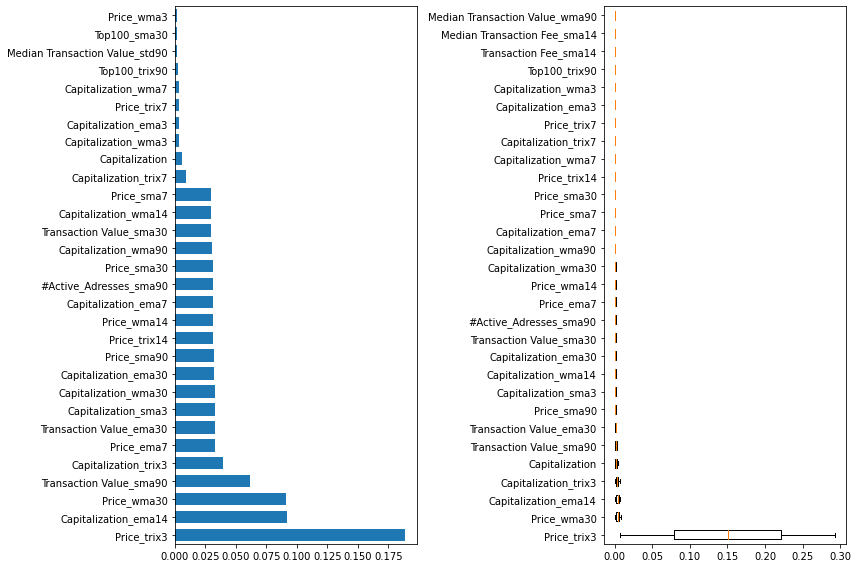

In [26]:
feature_perm = df_perm[0:30]
feature_imp = feat_imp.sort_values(['imps'],ascending=False)
feature_imp = feature_imp[0:30]

tree_indices = np.arange(0, len(feature_imp)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices,feature_imp['imps'].values, height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(feature_imp['cols'].values)
ax1.set_ylim((0, len(feature_imp)))

ax2.boxplot(feature_perm, vert=False,labels=feature_perm.index.values)
fig.tight_layout()
plt.show()

# Sélection des variables à partir des méthodes précédentes

**1. Elimination préliminaire dans les résultats de la première méthode**

In [27]:
feature_imp = feat_imp.sort_values(['imps'],ascending=False)
feature_imp = feature_imp.reset_index()
feature_imp


,index,cols,imps
0,777,Price_trix3,1.889959e-01
1,776,Capitalization_ema14,9.180305e-02
2,775,Price_wma30,9.098488e-02
3,774,Transaction Value_sma90,6.169634e-02
4,773,Capitalization_trix3,3.912887e-02
...,...,...,...
773,4,FeeInReward_trix14,2.489184e-09
774,3,Difficulty_roc7,2.128329e-09
775,2,Median Transaction Fee_rsi30,2.098981e-09
776,1,Google GTrends_std7,1.492053e-09


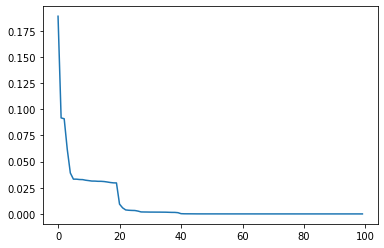

In [28]:
feature_imp = feat_imp.sort_values(['imps'],ascending=False)
feature_imp = feature_imp.reset_index()
feature_imp = feature_imp[0:100]
feature_imp = feature_imp.reset_index()

plt.plot(feature_imp.index.values,feature_imp['imps'])

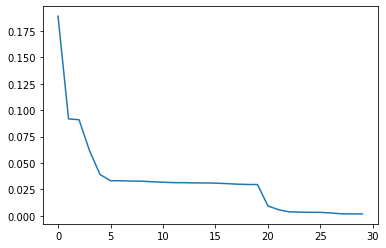

In [29]:
feature_imp = feat_imp.sort_values(['imps'],ascending=False)
feature_imp = feature_imp.reset_index()
feature_imp = feature_imp[0:30]
feature_imp = feature_imp.reset_index()

plt.plot(feature_imp.index.values,feature_imp['imps'])

On retient les 30 premières variables

**2. Elimination préliminaire dans les résultats de la deuxième méthode**

On commence par rechercher le minimum où la courbe se stabilise :

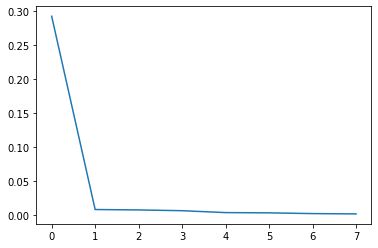

In [34]:
feature_perm = df_perm.sort_values(['mean'],ascending=False)
feature_perm = feature_perm.reset_index()
feature_perm = feature_perm[0:8]
feature_perm = feature_perm.reset_index()

plt.plot(feature_perm.index.values,feature_perm['mean'])

On affiche maintenant l'écart type de chaque variable :

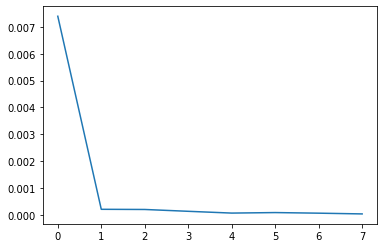

In [35]:
feature_perm = df_perm.sort_values(['mean'],ascending=False)
feature_perm = feature_perm.reset_index()
feature_perm = feature_perm[0:8]
feature_perm = feature_perm.reset_index()

plt.plot(feature_perm.index.values,feature_perm['std'])

On fit cette courbe avec un modèle CART (Classification and Regression Trees) :

In [37]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(criterion="mse")
regr.fit(np.reshape(np.array(feature_perm.index.values),(-1,1)),feature_perm['std'].values)
y_reg = regr.predict(np.reshape(np.array(feature_perm.index.values),(-1,1)))

In [38]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatter(x=feature_perm.index.values,y=feature_perm['std'],line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=feature_perm.index.values,y=y_reg,line=dict(color='red', width=1)))

fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

In [39]:
index = []

for i in feature_perm.index.values.astype(np.int32):
  if feature_perm['std'].values[i] >= y_reg[i]:
    index.append(i)

In [40]:
index

[0, 1, 2, 3]

In [41]:
variables_selected = feature_perm.iloc[index]
variables_selected = variables_selected.drop(columns='level_0')
variables_selected['index'].values

array(['Price_trix3', 'Price_wma30', 'Capitalization_ema14',
       'Capitalization_trix3'], dtype=object)

**Fusion des valeurs**

In [42]:
df_reduit1 = X[feature_imp['cols'].values]
df_reduit1

,Price_trix3,Capitalization_ema14,Price_wma30,Transaction Value_sma90,Capitalization_trix3,Price_ema7,Transaction Value_ema30,Capitalization_sma3,Capitalization_wma30,Capitalization_ema30,Price_sma90,Price_trix14,Price_wma14,Capitalization_ema7,#Active_Adresses_sma90,Price_sma30,Capitalization_wma90,Transaction Value_sma30,Capitalization_wma14,Price_sma7,Capitalization_trix7,Capitalization,Capitalization_wma3,Capitalization_ema3,Price_trix7,Capitalization_wma7,Top100_trix90,Median Transaction Value_std90,Top100_sma30,Price_wma3
0,200.277825,3.066087e+09,6580.913978,16670.522222,2.697234e+09,215.852423,1983.624841,2.759515e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.287908e+09,2.779427e+09,2.809756e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,1050.333333
1,200.277825,3.066087e+09,6580.913978,16670.522222,2.697234e+09,215.852423,1983.624841,2.759515e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.272409e+09,2.779427e+09,2.809756e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,1050.333333
2,311.187667,3.066087e+09,6580.913978,16670.522222,4.212884e+09,215.852423,1983.624841,4.212884e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.078336e+09,4.177955e+09,4.212884e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,309.181833
3,279.365958,3.066087e+09,6580.913978,16670.522222,3.818438e+09,215.852423,1983.624841,4.037611e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,3.762088e+09,3.952557e+09,3.987486e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,290.998000
4,270.146021,3.066087e+09,6580.913978,16670.522222,3.684620e+09,215.852423,1983.624841,3.848725e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,3.705753e+09,3.786628e+09,3.846619e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,278.243167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,50271.303907,1.059442e+12,57910.212903,298779.222222,9.395451e+11,54924.950243,345209.989689,9.914630e+11,1.081851e+12,1.064893e+12,50979.333333,53036.791085,56840.800000,1.026382e+12,961591.827778,57747.200000,1.029652e+12,326790.733333,1.062126e+12,55492.571429,9.513219e+11,9.324378e+11,9.741564e+11,9.793340e+11,50901.337908,1.010527e+12,14.621501,207.741041,14.391100,52124.833333
2305,49740.497274,1.042978e+12,57415.361290,299706.333333,9.296716e+11,53712.962682,340734.829064,9.580243e+11,1.072651e+12,1.056575e+12,51177.522222,51404.210129,55723.133333,1.003776e+12,962155.572222,57678.866667,1.029321e+12,326633.600000,1.041284e+12,53888.571429,9.270656e+11,9.359612e+11,9.464055e+11,9.576476e+11,49601.041308,9.852689e+11,14.635307,205.604200,14.400500,50637.500000
2306,49469.774482,1.027668e+12,56897.821505,300679.933333,9.246565e+11,52698.972012,340513.356221,9.321848e+11,1.063026e+12,1.048290e+12,51358.644444,50096.243217,54642.695238,9.848712e+11,961547.150000,57560.500000,1.028736e+12,329083.233333,1.021137e+12,52970.571429,9.126436e+11,9.281555e+11,9.314711e+11,9.429015e+11,48826.995139,9.655423e+11,14.653635,207.981777,14.414233,49836.000000
2307,52472.951755,1.022736e+12,56603.595699,304149.111111,9.808259e+11,52774.229009,349144.171948,9.515974e+11,1.057574e+12,1.044573e+12,51591.411111,50355.121841,54104.533333,9.863223e+11,958993.638889,57488.000000,1.029450e+12,337020.000000,1.011125e+12,52486.714286,9.443038e+11,9.906756e+11,9.607165e+11,9.667886e+11,50518.733786,9.6

In [43]:
df_reduit2 = X[variables_selected['index'].values]
df_reduit2

,Price_trix3,Price_wma30,Capitalization_ema14,Capitalization_trix3
0,200.277825,6580.913978,3.066087e+09,2.697234e+09
1,200.277825,6580.913978,3.066087e+09,2.697234e+09
2,311.187667,6580.913978,3.066087e+09,4.212884e+09
3,279.365958,6580.913978,3.066087e+09,3.818438e+09
4,270.146021,6580.913978,3.066087e+09,3.684620e+09
...,...,...,...,...
2304,50271.303907,57910.212903,1.059442e+12,9.395451e+11
2305,49740.497274,57415.361290,1.042978e+12,9.296716e+11
2306,49469.774482,56897.821505,1.027668e+12,9.246565e+11
2307,52472.951755,56603.595699,1.022736e+12,9.808259e+11


In [44]:
df_merged=df_reduit2.merge(df_reduit1,how='outer')
df_merged

,Price_trix3,Price_wma30,Capitalization_ema14,Capitalization_trix3,Transaction Value_sma90,Price_ema7,Transaction Value_ema30,Capitalization_sma3,Capitalization_wma30,Capitalization_ema30,Price_sma90,Price_trix14,Price_wma14,Capitalization_ema7,#Active_Adresses_sma90,Price_sma30,Capitalization_wma90,Transaction Value_sma30,Capitalization_wma14,Price_sma7,Capitalization_trix7,Capitalization,Capitalization_wma3,Capitalization_ema3,Price_trix7,Capitalization_wma7,Top100_trix90,Median Transaction Value_std90,Top100_sma30,Price_wma3
0,200.277825,6580.913978,3.066087e+09,2.697234e+09,16670.522222,215.852423,1983.624841,2.759515e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.287908e+09,2.779427e+09,2.809756e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,1050.333333
1,200.277825,6580.913978,3.066087e+09,2.697234e+09,16670.522222,215.852423,1983.624841,2.759515e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.272409e+09,2.779427e+09,2.809756e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,1050.333333
2,200.277825,6580.913978,3.066087e+09,2.697234e+09,16670.522222,215.852423,1983.624841,2.759515e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.287908e+09,2.779427e+09,2.809756e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,1050.333333
3,200.277825,6580.913978,3.066087e+09,2.697234e+09,16670.522222,215.852423,1983.624841,2.759515e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.272409e+09,2.779427e+09,2.809756e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,1050.333333
4,311.187667,6580.913978,3.066087e+09,4.212884e+09,16670.522222,215.852423,1983.624841,4.212884e+09,3.087549e+09,3.189435e+09,3756.922222,201.588701,219.074752,2.935440e+09,214954.355556,3547.900000,3.311191e+09,1931.566667,2.970381e+09,1132.571429,2.632577e+09,4.078336e+09,4.177955e+09,4.212884e+09,194.405452,2.820663e+09,13.152148,13.787711,14.340933,309.181833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,50271.303907,57910.212903,1.059442e+12,9.395451e+11,298779.222222,54924.950243,345209.989689,9.914630e+11,1.081851e+12,1.064893e+12,50979.333333,53036.791085,56840.800000,1.026382e+12,961591.827778,57747.200000,1.029652e+12,326790.733333,1.062126e+12,55492.571429,9.513219e+11,9.324378e+11,9.741564e+11,9.793340e+11,50901.337908,1.010527e+12,14.621501,207.741041,14.391100,52124.833333
2307,49740.497274,57415.361290,1.042978e+12,9.296716e+11,299706.333333,53712.962682,340734.829064,9.580243e+11,1.072651e+12,1.056575e+12,51177.522222,51404.210129,55723.133333,1.003776e+12,962155.572222,57678.866667,1.029321e+12,326633.600000,1.041284e+12,53888.571429,9.270656e+11,9.359612e+11,9.464055e+11,9.576476e+11,49601.041308,9.852689e+11,14.635307,205.604200,14.400500,50637.500000
2308,49469.774482,56897.821505,1.027668e+12,9.246565e+11,300679.933333,52698.972012,340513.356221,9.321848e+11,1.063026e+12,1.048290e+12,51358.644444,50096.243217,54642.695238,9.848712e+11,961547.150000,57560.500000,1.028736e+12,329083.233333,1.021137e+12,52970.571429,9.126436e+11,9.281555e+11,9.314711e+11,9.429015e+11,48826.995139,9.655423e+11,14.653635,207.981777,14.414233,49836.000000
2309,52472.951755,56603.595699,1.022736e+12,9.808259e+11,304149.111111,52774.229009,349144.171948,9.515974e+11,1.057574e+12,1.044573e+12,51591.411111,50355.121841,54104.533333,9.863223e+11,958993.638889,57488.000000,1.029450e+12,337020.000000,1.011125e+12,52486.714286,9.443038e+11,9.906756e+11,9.607165e+11,9.667886e+11,50518.733786,9

**Elimination des variables corrélées**

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#function for removing features with high vif
def drop_high_vif(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

#function for listing vif values
def vif_values(X):
    add_constant(X)
    df=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    return df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [46]:
variables_selected_reduit = drop_high_vif(df_merged,thresh=10)
variables_selected_reduit

dropping 'Capitalization_ema7' at index: 13
dropping 'Capitalization_wma3' at index: 21
dropping 'Capitalization_ema3' at index: 21
dropping 'Price_ema7' at index: 5
dropping 'Capitalization_ema14' at index: 2
dropping 'Capitalization_trix7' at index: 17
dropping 'Price_trix7' at index: 18
dropping 'Price_trix14' at index: 9
dropping 'Capitalization_trix3' at index: 2
dropping 'Capitalization_ema30' at index: 6
dropping 'Price_trix3' at index: 0
dropping 'Capitalization_wma14' at index: 11
dropping 'Capitalization_wma7' at index: 13
dropping 'Price_wma14' at index: 6
dropping 'Price_wma3' at index: 15
dropping 'Capitalization_wma90' at index: 8
dropping 'Capitalization_sma3' at index: 3
dropping 'Price_sma30' at index: 6
dropping 'Price_sma7' at index: 7
dropping 'Capitalization_wma30' at index: 3
dropping 'Transaction Value_ema30' at index: 2
dropping 'Price_wma30' at index: 0
dropping 'Transaction Value_sma90' at index: 0
dropping 'Capitalization' at index: 3
dropping 'Top100_trix90'

,Transaction Value_sma30,Median Transaction Value_std90,Top100_sma30
0,1931.566667,13.787711,14.340933
1,1931.566667,13.787711,14.340933
2,1931.566667,13.787711,14.340933
3,1931.566667,13.787711,14.340933
4,1931.566667,13.787711,14.340933
...,...,...,...
2306,326790.733333,207.741041,14.391100
2307,326633.600000,205.604200,14.400500
2308,329083.233333,207.981777,14.414233
2309,337020.000000,206.599683,14.427533


# Sélection des variables par méthode RFE

In [ ]:
from sklearn.feature_selection import RFE

# Informations sur les données
n = 102               # Nombre d'observations
p = 6033              # Nombre de variables
n_arbres = 25
m_try = 768

clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features=m_try, n_jobs=-1)
rfe = RFE(estimator=clf, n_features_to_select=10, step=1, verbose=1)
rfe.fit(X, tf.squeeze(np.asarray(y),1))

# Sélection des variables par méthode RFE-CV

In [55]:
from sklearn.feature_selection import RFECV

# Informations sur les données
n = 102               # Nombre d'observations
p = 6033              # Nombre de variables
n_arbres = 100
m_try = 768

clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features="auto", n_jobs=-1)
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='neg_mean_absolute_error',min_features_to_select=1, verbose=1,n_jobs=-1)
rfecv.fit(X, tf.squeeze(np.asarray(y),1))

KeyboardInterrupt: ignored

# Autre

In [ ]:
features_list=[]
indicateurs_techniques=['sma','ema','wma','trix', 'std','skew','rsi','roc']
periode=['3','7','14','30','90']

for indicateur in indicateurs_techniques:
    for i in periode:
      print("%s%s" %(indicateur, i))
      filtre = str(indicateur) + str(i) + "$"

      X = df_data.filter(regex=filtre,axis=1)
      X = SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(X)
      X = pd.DataFrame(X)
      X.columns = df_data.filter(regex=filtre,axis=1).columns

      rf1 = RandomForestRegressor(random_state=7,n_jobs=-1)
      rfecv = RFECV(rf1,step=0.9,min_features_to_select=1,verbose=1,cv=5,scoring='neg_mean_absolute_error', n_jobs=1)
      rfecv.fit(X,tf.squeeze(np.asarray(y),1))

      if rfecv.n_features_ > 1:
        rf1.fit(X,tf.squeeze(np.asarray(y),1))
        maximp = rf1.feature_importances_.max()
        for x in range(len(rf1.feature_importances_)):
          if maximp==rf1.feature_importances_[x]:
            new_features = X.columns[x]
      else:
        mask = rfecv.get_support()
        new_features = X.columns[mask]
      features_list.append(str(new_features))
      print(filtre+ ': ' + new_features)

In [ ]:
features_list

In [ ]:
l1=[]

for j in range(len(features_list)):
    result1 = re.search("'(.*)'],", features_list[j])
    if result1!=None:
        l1.append(result1.group(1))
        
for i in range(len(features_list)):
    result2 = re.search('.*',features_list[i])
    if len(result2.group(0))<33:
        l1.append(result2.group(0))

In [ ]:
l1.sort()
l1

In [ ]:
df_data_reduit=df_data[l1]
df_data_reduit.head()

Suppresion des valeurs non numériques :

In [ ]:
df_data_reduit = SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df_data_reduit)
df_data_reduit = pd.DataFrame(X)
df_data_reduit.columns = df_data_reduit.columns
df_data_reduit

# Identifications des variables réstantes collinéraires 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#function for removing features with high vif
def drop_high_vif(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

#function for listing vif values
def vif_values(X):
    add_constant(X)
    df=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    return df


In [ ]:
df_data_reduit = drop_high_vif(df_data_reduit,thresh=5)
df_data_reduit

In [ ]:
vif_values(df_data_reduit)

In [ ]:
Raw=drop_high_vif(X_raw,thresh=10)

In [ ]:
vif_values(Raw)

In [ ]:
Raw.insert(0,'Dates',df_data['Dates'])
df_data_reduit.insert(0,'Dates',df_data['Dates'])

In [ ]:
df_merged=Raw.merge(df_data_reduit,how='outer')
df_merged.drop_duplicates()

In [ ]:
df_merged.drop(columns='Dates',inplace=True)

In [ ]:
df_data_reduit=drop_high_vif(df_merged,thresh=10)
df_data_reduit

In [ ]:
vif_values(df_data_reduit)

In [ ]:
rf_final=RandomForestRegressor(random_state=7,n_jobs=-1)
rf_final.fit(df_data_reduit,tf.squeeze(np.asarray(y),1))

In [ ]:
# function for creating a feature importance dataframe
def feature_importance(column_names, importances):
    df = pd.DataFrame({'feature': column_names, 'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
    return df

In [ ]:
# plotting a feature importance dataframe (horizontal barchart)
def plot_feature_importance(imp_df, title):
    # figure size in inches
    plt.rcParams['figure.figsize'] = 11.7,8.27
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, color = 'royalblue').set_title(title, fontsize = 20)

In [ ]:
imp_feat=feature_importance(df_data_reduit.columns,rf_final.feature_importances_)
plot_feature_importance(imp_feat,'feature importance')

In [ ]:
imp_feat[imp_feat['feature_importance']>0]

In [ ]:
selected = imp_feat[imp_feat['feature_importance']>0]
selected

In [ ]:
selected.feature_importance.sum()

In [ ]:
df_data_reduit_high = df_data_reduit[np.asarray(selected.feature)]
df_data_reduit_high.sort_index(axis=1,inplace=True)
df_data_reduit_high['Price'] = np.ravel(y)
df_data_reduit_high = df_data_reduit_high[df_data_reduit_high['Price']!=1]
df_data_reduit_high

In [ ]:
corr = df_data_reduit_high.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')

In [ ]:
from sklearn.ensemble import IsolationForest

anomalies=IsolationForest(contamination=0.1)

price=df_data_reduit_high['Price']
price=price.values
price=np.reshape(price,(-1,1))
anomalies.fit(price)

pred=anomalies.predict(price)

df_data_reduit_high['Anomalies'] = pred
df_data_reduit_high['Anomalies'] = df_data_reduit_high['Anomalies'].apply(lambda x: 1 if (x==-1) else 0)

# Affiche les informations sur les anomalies
print(df_data_reduit_high['Anomalies'].value_counts())

In [ ]:
import plotly.express as px

# Affiche la série

fig = px.line(x=df_data_reduit_high.index,y=df_data_reduit_high['Price'],title="Evolution du prix du BTC")
fig.add_trace(px.scatter(x=df_data_reduit_high.index,y=df_data_reduit_high['Anomalies']*df_data_reduit_high['Price'],color=df_data_reduit_high['Anomalies'].astype(np.bool)).data[0])

fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

In [ ]:
#df_data_reduit_high.reset_index(drop=True,inplace=True)
df_data_reduit_high.drop(columns=['Anomalies'],inplace=True)

In [ ]:
df_data_reduit_high.insert(0,'Dates',df_data['Dates'])
df_data_reduit_high.set_index(df_data_reduit_high['Dates'])
df_data_reduit_high

In [ ]:
df_data_reduit_high.columns

In [ ]:
df_data_reduit_high.to_csv('reg_1d.csv')